# Example of using Pandas on a Real Data Set

We will investigate the number of fire related incidents in Toronto as a function of time  using Toronto's Open Data (see https://open.toronto.ca/dataset/fire-incidents/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read Toronto open data on Fire Incidents

In [3]:
URL = "https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/fa5c7de5-10f8-41cf-883a-9b30a67c7b56?format=csv"
df = pd.read_csv(URL, parse_dates=[
        'Fire_Under_Control_Time', 
        'Last_TFS_Unit_Clear_Time', 
        'TFS_Alarm_Time', 
        'TFS_Arrival_Time'])
# note: this forces the known columns with datetime info to be interpreted as such.

In [4]:
# Add explicit year, month and monthyear columns for later sorting
df['Year'] = ""
df['Year'] = df['TFS_Alarm_Time'].dt.year
df['Month'] = ""
df['Month'] = df['TFS_Alarm_Time'].dt.month
df['MonthYear'] = ""
df['MonthYear'] = df['TFS_Alarm_Time'].dt.year*12 + df['TFS_Alarm_Time'].dt.month - 1

## Plot routine

In [5]:
def makeplot(x, y, xlabel, ylabel, filename, xticks=None):
    """Helper function for plotting xy data"""
    plt.figure()
    plt.plot(x, y, 'o')
    plt.ylim((min(-0.1,1.1*min(y)), 1.1 * max(y)))
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    if not xticks is None:
        plt.xticks(xticks)
    plt.savefig(filename)

In [6]:
# Filter out the cases with unknown causes (false alarms)
df2 = df[df['Possible_Cause'].notnull()]

## Main Causes of Fires

In [7]:
possible_causes = df2['Possible_Cause'].value_counts()
print(possible_causes.head(5))

99 - Undetermined                                 3143
52 - Electrical Failure                           2555
45 - Improperly Discarded                         1811
44 - Unattended                                   1594
60 - Other unintentional cause, not classified    1243
Name: Possible_Cause, dtype: int64


## Average the number of incidents by month
average is over all the years in the data set

In [8]:
allyears = df2['Year'].unique()
numyears = len(allyears)
average_counts_per_month = df2['Month'].value_counts() / numyears
months = average_counts_per_month.index.values
allmonths = df2['Month'].unique();

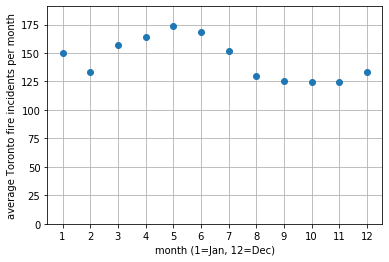

In [9]:
#plot it
makeplot(
        months,
        average_counts_per_month,
        'month (1=Jan, 12=Dec)',
        'average Toronto fire incidents per month',
        'average_counts_per_month.png',
        xticks=allmonths)

# Incidents as a function of time

In [10]:
counts_by_month = df2['MonthYear'].value_counts()
allyears = df2['Year'].unique()
fractionalyears = counts_by_month.index.values/12

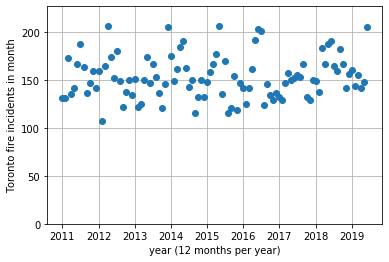

In [11]:
makeplot(
        fractionalyears,
        counts_by_month,
        'year (12 months per year)',
        'Toronto fire incidents in month',
        'counts_by_month.png',
        xticks=allyears)